In [24]:
import numpy as np
from scipy.constants import c, epsilon_0, hbar

gamma_d1 = 5.746*np.pi
d_d1 = 2.537*10**(-29)
typical_waist_size=10

def rabi_to_laserpower(omega, d, cg, beam_waist):
    """
    Convert Rabi frequency to laser power
    Input agrs:
    omega: Rabi frequency in MHz
    d: dipole moment in C*m
    cg: angular CG dependence
    beam_waist: beam waist in micron"""
    efield=(hbar*(omega*10**6))/(d*cg)
    intensity=(efield**2*epsilon_0*c)/(2)
    return (intensity*np.pi*(beam_waist*10**(-6))**2)*10**(3) # in mW

def laserpower_to_rabi(power, d, cg, beam_waist):
    """
    Convert laser power to Rabi frequency
    Input agrs:
    power: power in mW
    d: dipole moment in C*m
    cg: angular CG dependence
    beam_waist: beam waist in micron"""
    intensity=power/(np.pi*(beam_waist*10**(-6))**2*10**3)
    efield=np.sqrt((2*intensity)/(epsilon_0*c))
    omega=(d*cg*efield)/(hbar*10**6)
    return omega #in MHz

In [25]:
#effective_omega*10=pi

def det_to_omega(effective_omega, det, cg):
    """
    calculate the single photon Rabi frequency for a given detuning and effective Rabi frequency
    Input args:
    effective_omega: effective Rabi frequency in MHz
    det: detuning in MHz
    cg: angular CG dependence"""

    det=abs(det)
    omega=np.sqrt((cg*effective_omega)*2*det)
    return omega

def omega_det_to_scat(omega, delta, gamma=gamma_d1):
    """
    calculate the scattering rate for a given detuning and single photon Rabi frequency
    Input args:
    omega: single photon Rabi frequency in MHz
    delta: detuning in MHz
    gamma: natural linewidth in 2pi MHz"""
    
    delta=abs(delta)
    decay_rate = np.sqrt(2*gamma)
    delta_scaling=omega**2/(4*delta**2)
    effective_omega=omega**2/(2*delta)
    #calculate this for pi pulse
    time=np.pi/effective_omega
    return time*decay_rate*delta_scaling

def power_for_pi_pulse_fixed_duration(delta, time, cg, beam_waist=typical_waist_size,d=d_d1):
    """
    calculate the laser power required for a pi pulse with a fixed duration
    Input args:
    delta: detuning in MHz
    time: pulse duration in microseconds
    cg: angular CG dependence
    beam_waist: beam waist in micron
    d: dipole moment in C*m"""
    
    effective_omega=np.pi/time
    omega_required=det_to_omega(effective_omega, delta, cg)
    return rabi_to_laserpower(omega_required, d, cg, beam_waist)



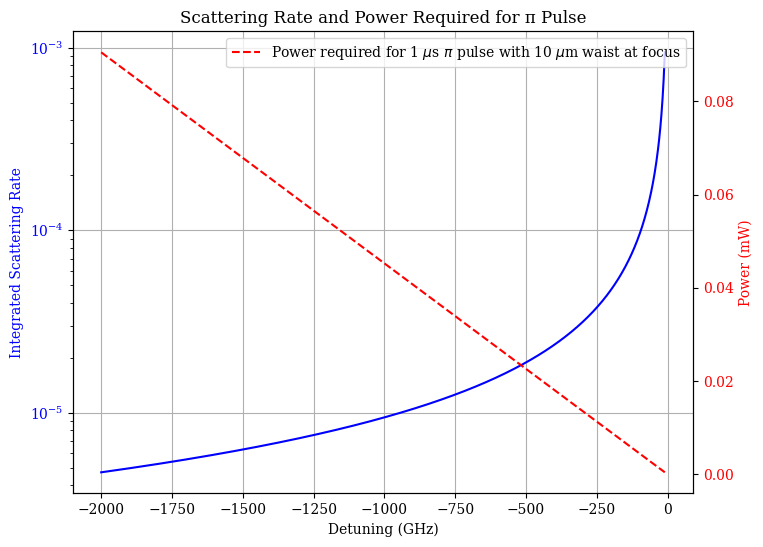

In [26]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')

detuning = np.linspace(-2000,-10, 1000) #in GHz
cg=1/np.sqrt(2) #just an example

# Compute scattering rate
power_required = power_for_pi_pulse_fixed_duration(detuning*10**3, 1, 1)
rabi_frequency = laserpower_to_rabi(power_required, d_d1, cg, typical_waist_size)
scattering_rate = omega_det_to_scat(rabi_frequency, detuning*10**3)

# Plot with dual axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Left axis (Scattering Rate)
ax1.plot(detuning, scattering_rate, label="Scattering Rate", color="blue")
ax1.set_xlabel("Detuning (GHz)")
ax1.set_ylabel("Integrated Scattering Rate", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_yscale("log")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(
    detuning,
    power_required,
    label=r"Power required for 1 $\mu$s $\pi$ pulse with 10 $\mu$m waist at focus",
    color="red",
    linestyle="--",
)
ax2.set_ylabel("Power (mW)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend()


# Title and legend
plt.title("Scattering Rate and Power Required for π Pulse")
plt.show()


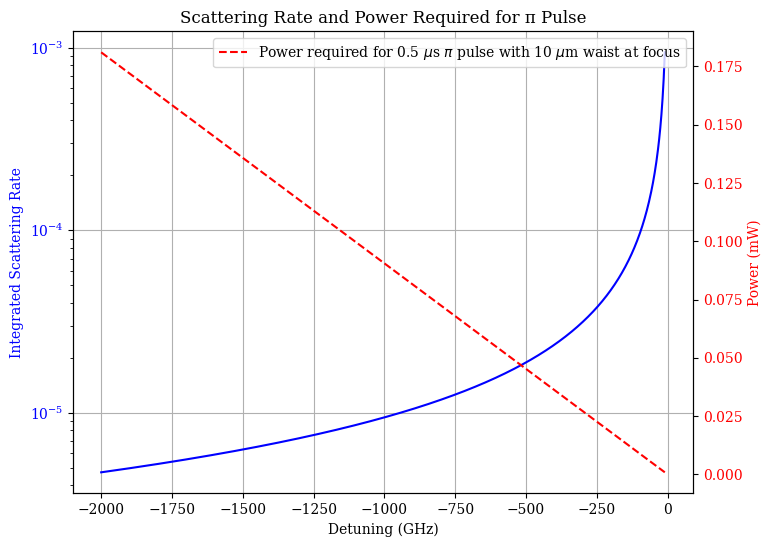

In [27]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')

detuning = np.linspace(-2000,-10, 1000) #in GHz
cg=1/np.sqrt(2) #just an example

# Compute scattering rate
power_required = power_for_pi_pulse_fixed_duration(detuning*10**3, 0.5, 1)
rabi_frequency = laserpower_to_rabi(power_required, d_d1, cg, typical_waist_size)
scattering_rate = omega_det_to_scat(rabi_frequency, detuning*10**3)

# Plot with dual axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Left axis (Scattering Rate)
ax1.plot(detuning, scattering_rate, label="Scattering Rate", color="blue")
ax1.set_xlabel("Detuning (GHz)")
ax1.set_ylabel("Integrated Scattering Rate", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_yscale("log")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(
    detuning,
    power_required,
    label=r"Power required for 0.5 $\mu$s $\pi$ pulse with 10 $\mu$m waist at focus",
    color="red",
    linestyle="--",
)
ax2.set_ylabel("Power (mW)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend()


# Title and legend
plt.title("Scattering Rate and Power Required for π Pulse")
plt.show()

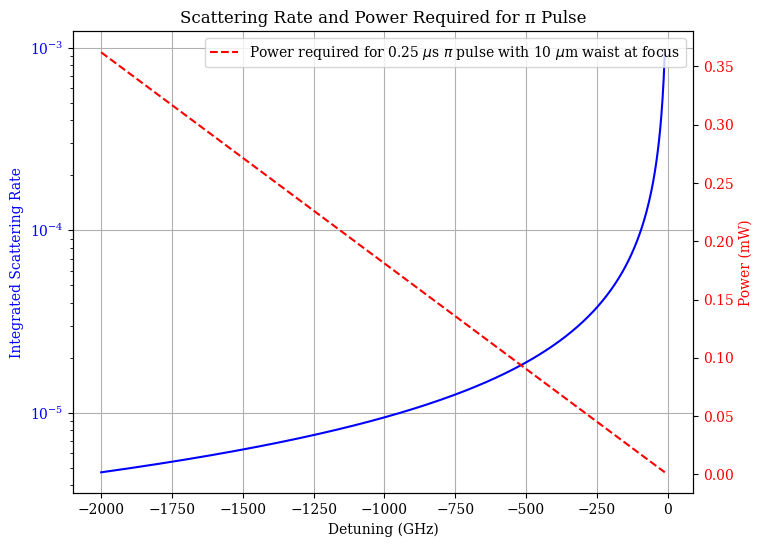

In [28]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')

detuning = np.linspace(-2000,-10, 1000) #in GHz
cg=1/np.sqrt(2) #just an example

# Compute scattering rate
power_required = power_for_pi_pulse_fixed_duration(detuning*10**3, 0.25, 1)
rabi_frequency = laserpower_to_rabi(power_required, d_d1, cg, typical_waist_size)
scattering_rate = omega_det_to_scat(rabi_frequency, detuning*10**3)

# Plot with dual axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Left axis (Scattering Rate)
ax1.plot(detuning, scattering_rate, label="Scattering Rate", color="blue")
ax1.set_xlabel("Detuning (GHz)")
ax1.set_ylabel("Integrated Scattering Rate", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_yscale("log")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(
    detuning,
    power_required,
    label=r"Power required for 0.25 $\mu$s $\pi$ pulse with 10 $\mu$m waist at focus",
    color="red",
    linestyle="--",
)
ax2.set_ylabel("Power (mW)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend()


# Title and legend
plt.title("Scattering Rate and Power Required for π Pulse")
plt.show()

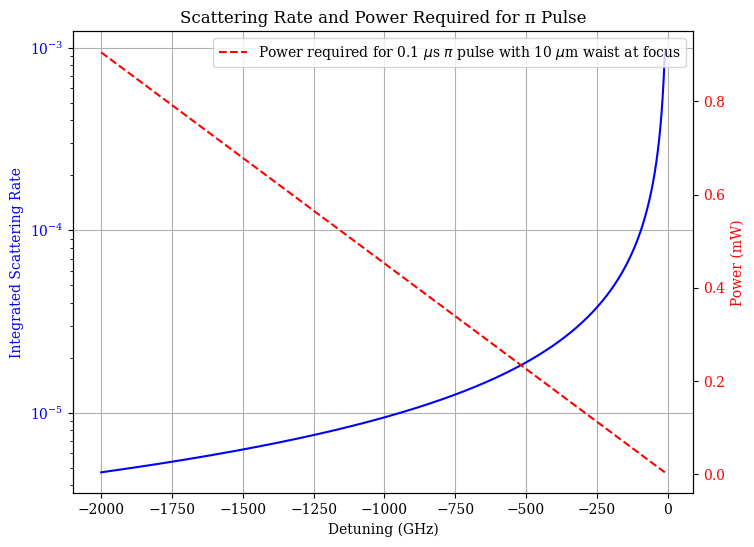

In [29]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')

detuning = np.linspace(-2000,-10, 1000) #in GHz
cg=1/np.sqrt(2) #just an example

# Compute scattering rate
power_required = power_for_pi_pulse_fixed_duration(detuning*10**3, 0.1, 1)
rabi_frequency = laserpower_to_rabi(power_required, d_d1, cg, typical_waist_size)
scattering_rate = omega_det_to_scat(rabi_frequency, detuning*10**3)

# Plot with dual axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Left axis (Scattering Rate)
ax1.plot(detuning, scattering_rate, label="Scattering Rate", color="blue")
ax1.set_xlabel("Detuning (GHz)")
ax1.set_ylabel("Integrated Scattering Rate", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_yscale("log")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(
    detuning,
    power_required,
    label=r"Power required for 0.1 $\mu$s $\pi$ pulse with 10 $\mu$m waist at focus",
    color="red",
    linestyle="--",
)
ax2.set_ylabel("Power (mW)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend()


# Title and legend
plt.title("Scattering Rate and Power Required for π Pulse")
plt.show()